In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
style.use('ggplot')

The aggregated data from "SFdep_budgets_1999-2017.csv" has to much noise with the departments, going to make the data more broad by focusing on the column Organization Group

In [2]:
df = pd.read_csv('../../../SF_data/Spending_Revenue_cleaned.csv')
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

,Fiscal Year,Revenue or Spending,Related Govt Units,Organization Group,Department,Program,Character,Object,Sub-object,Fund,Fund Category,Amount
0,1999,Revenue,No,Public Protection,ADP Adult Probation,Community Services,Charges For Services,Public Safety Service Charges,Other Public Safety Charges,General Fund,Operating,26742.00
1,1999,Spending,No,Public Protection,PDR Public Defender,Criminal And Special Defense,Non Personnel Services,Training,Training Costs Paid To Emplye,General Fund,Operating,425.83
2,1999,Spending,No,"Public Works, Transportation & Commerce",WTR Water Enterprise,Water Facilities Maintenance Projects,Salaries,Permanent Salaries-Misc,Misc-Other Timeoff,Water Operating Fund,Continuing Projects,17433.51
3,1999,Spending,No,General Administration & Finance,ADM Gen Svcs Agency-City Admin,Ag Wts & Measures Inspection,Non Personnel Services,Employee Expenses,Local Field Exp,General Fund,Work Orders/Overhead,24.00
4,1999,Spending,No,"Public Works, Transportation & Commerce",DPW GSA - Public Works,Engineering,Mandatory Fringe Benefits,Unemployment Insurance,Unemployment Insurance,General Fund,Continuing Projects,380.15


In [3]:
df['Organization Group'].value_counts()

Public Works, Transportation & Commerce     192760
General Administration & Finance             99195
Public Protection                            63067
Community Health                             60469
Culture & Recreation                         55874
Human Welfare & Neighborhood Development     42372
General City Responsibilities                 5312
Name: Organization Group, dtype: int64

In [4]:
df_aggregated_sums = df.groupby(['Organization Group'])[['Amount']].agg('sum')
df_aggregated_sums.columns = ['Amount_Sum_199-2017']
df_aggregated_sums

,Amount_Sum_199-2017
Organization Group,
Community Health,4.828644e+10
Culture & Recreation,9.943911e+09
General Administration & Finance,6.296023e+10
General City Responsibilities,3.951398e+10
Human Welfare & Neighborhood Development,3.553107e+10
Public Protection,2.514078e+10
"Public Works, Transportation & Commerce",1.201477e+11


In [5]:
years = df['Fiscal Year'].unique()
years

array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], dtype=int64)

In [6]:
df_year = []
for index, year in enumerate(years):
    df_year.append( df[df['Fiscal Year'] == year])

In [7]:
df_year[18].head()

,Fiscal Year,Revenue or Spending,Related Govt Units,Organization Group,Department,Program,Character,Object,Sub-object,Fund,Fund Category,Amount
488450,2017,Spending,No,"Public Works, Transportation & Commerce",MTA Municipal Transprtn Agncy,Capital Programs & Construction,Mandatory Fringe Benefits,Other Fringe Benefits,Other Fringe Benefits,Parking & Traffic Capital Projects Fund,Continuing Projects,36785.25
488451,2017,Spending,No,"Public Works, Transportation & Commerce",HHP Hetch Hetchy Water & Power,Administration,Mandatory Fringe Benefits,Dental Coverage,Dental Coverage,Water Operating Fund,Work Orders/Overhead,42.29
488452,2017,Spending,No,"Public Works, Transportation & Commerce",DPW GSA - Public Works,DPW Labor Cost Distribution,Overhead and Allocations,Overhead,Division Overhead,"Public Works, Transp. & Commerce Fund",Work Orders/Overhead,1310.18
488453,2017,Spending,No,General Administration & Finance,ADM Gen Svcs Agency-City Admin,Medical Examiner,Mandatory Fringe Benefits,Retirement,Retire City Misc,General Fund,Operating,716703.15
488454,2017,Spending,No,Public Protection,POL Police,Patrol,Salaries,Permanent Salaries-Misc,Misc-Vacation,Gift Fund,Grants,702.96


In [8]:
organization_sums = []
for i in range(19):
    organization_sums.append( pd.DataFrame(df_year[i].groupby('Organization Group').Amount.agg('sum')) )
    col_year = years[i]
    organization_sums[i].columns = [col_year]

In [9]:
df_aggregated=pd.concat(organization_sums, axis=1)
df_aggregated

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Organization Group,,,,,,,,,,,,,,,,,,,
Community Health,1.612314e+09,1.666675e+09,1.755967e+09,1.887998e+09,1.992195e+09,1.966344e+09,2.329132e+09,2.212122e+09,2.327420e+09,2.453309e+09,2.705308e+09,2.888228e+09,2.671794e+09,2.925926e+09,3.432467e+09,3.254670e+09,3.390694e+09,3.252869e+09,3.561006e+09
Culture & Recreation,3.825467e+08,4.583067e+08,6.753082e+08,4.329307e+08,6.281843e+08,3.010599e+08,4.126565e+08,3.776705e+08,4.003927e+08,4.827856e+08,5.147807e+08,5.065681e+08,4.712109e+08,5.423614e+08,5.925263e+08,5.566385e+08,6.579489e+08,9.014759e+08,6.485579e+08
General Administration & Finance,1.526019e+09,3.909662e+09,3.408205e+08,1.161024e+09,2.256168e+09,2.400659e+09,2.487618e+09,2.723536e+09,2.986637e+09,3.267007e+09,3.378831e+09,3.487276e+09,3.853319e+09,4.314200e+09,4.259893e+09,4.448084e+09,5.182779e+09,5.389632e+09,5.587066e+09
General City Responsibilities,1.270159e+09,1.309816e+09,1.493750e+09,1.517575e+09,1.399779e+09,1.644322e+09,1.604909e+09,1.741225e+09,1.848696e+09,1.908207e+09,2.024137e+09,2.105829e+09,2.286421e+09,2.465610e+09,2.495882e+09,2.732683e+09,3.016059e+09,3.094904e+09,3.554021e+09
Human Welfare & Neighborhood Development,8.493115e+08,8.543557e+08,9.487989e+08,1.063567e+09,1.108114e+09,1.222138e+09,1.574985e+09,1.787388e+09,1.820610e+09,1.943585e+09,2.137295e+09,2.375064e+09,2.080685e+09,2.253365e+09,2.348008e+09,2.490060e+09,2.608696e+09,2.936552e+09,3.128494e+09
Public Protection,9.310256e+08,1.005086e+09,1.024478e+09,1.036655e+09,1.090154e+09,1.056840e+09,1.146008e+09,1.250613e+09,1.310565e+09,1.405172e+09,1.361873e+09,1.365538e+09,1.403654e+09,1.464716e+09,1.549459e+09,1.602411e+09,1.631839e+09,1.725217e+09,1.779477e+09
"Public Works, Transportation & Commerce",4.780520e+09,4.599662e+09,5.322671e+09,4.868352e+09,4.496670e+09,4.384721e+09,4.271710e+09,5.037253e+09,5.309552e+09,5.193302e+09,5.607924e+09,7.498776e+09,7.530713e+09,8.454934e+09,8.609977e+09,8.731192e+09,8.049307e+09,9.111917e+09,8.288559e+09


In [10]:
df_aggregated.isnull().sum()

1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
dtype: int64

In [11]:
df_aggregated_final = df_aggregated.copy()

In [12]:
df_aggregated_final['Organization Group'] = df_aggregated_final.index
cols = df_aggregated_final.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_aggregated_final = df_aggregated_final[cols]

In [13]:
index = np.linspace(0, len(df_aggregated_final['Organization Group']),
                    len(df_aggregated_final['Organization Group']), dtype=int)

In [14]:
df_aggregated_final.index = index

In [15]:
df_aggregated_final

,Organization Group,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Community Health,1.612314e+09,1.666675e+09,1.755967e+09,1.887998e+09,1.992195e+09,1.966344e+09,2.329132e+09,2.212122e+09,2.327420e+09,2.453309e+09,2.705308e+09,2.888228e+09,2.671794e+09,2.925926e+09,3.432467e+09,3.254670e+09,3.390694e+09,3.252869e+09,3.561006e+09
1,Culture & Recreation,3.825467e+08,4.583067e+08,6.753082e+08,4.329307e+08,6.281843e+08,3.010599e+08,4.126565e+08,3.776705e+08,4.003927e+08,4.827856e+08,5.147807e+08,5.065681e+08,4.712109e+08,5.423614e+08,5.925263e+08,5.566385e+08,6.579489e+08,9.014759e+08,6.485579e+08
2,General Administration & Finance,1.526019e+09,3.909662e+09,3.408205e+08,1.161024e+09,2.256168e+09,2.400659e+09,2.487618e+09,2.723536e+09,2.986637e+09,3.267007e+09,3.378831e+09,3.487276e+09,3.853319e+09,4.314200e+09,4.259893e+09,4.448084e+09,5.182779e+09,5.389632e+09,5.587066e+09
3,General City Responsibilities,1.270159e+09,1.309816e+09,1.493750e+09,1.517575e+09,1.399779e+09,1.644322e+09,1.604909e+09,1.741225e+09,1.848696e+09,1.908207e+09,2.024137e+09,2.105829e+09,2.286421e+09,2.465610e+09,2.495882e+09,2.732683e+09,3.016059e+09,3.094904e+09,3.554021e+09
4,Human Welfare & Neighborhood Development,8.493115e+08,8.543557e+08,9.487989e+08,1.063567e+09,1.108114e+09,1.222138e+09,1.574985e+09,1.787388e+09,1.820610e+09,1.943585e+09,2.137295e+09,2.375064e+09,2.080685e+09,2.253365e+09,2.348008e+09,2.490060e+09,2.608696e+09,2.936552e+09,3.128494e+09
5,Public Protection,9.310256e+08,1.005086e+09,1.024478e+09,1.036655e+09,1.090154e+09,1.056840e+09,1.146008e+09,1.250613e+09,1.310565e+09,1.405172e+09,1.361873e+09,1.365538e+09,1.403654e+09,1.464716e+09,1.549459e+09,1.602411e+09,1.631839e+09,1.725217e+09,1.779477e+09
7,"Public Works, Transportation & Commerce",4.780520e+09,4.599662e+09,5.322671e+09,4.868352e+09,4.496670e+09,4.384721e+09,4.271710e+09,5.037253e+09,5.309552e+09,5.193302e+09,5.607924e+09,7.498776e+09,7.530713e+09,8.454934e+09,8.609977e+09,8.731192e+09,8.049307e+09,9.111917e+09,8.288559e+09


In [16]:
df_aggregated_final.to_csv('../../../SF_data/SF_Organization_Groups_1999-2017.csv')

In [17]:
df_aggregated

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Organization Group,,,,,,,,,,,,,,,,,,,
Community Health,1.612314e+09,1.666675e+09,1.755967e+09,1.887998e+09,1.992195e+09,1.966344e+09,2.329132e+09,2.212122e+09,2.327420e+09,2.453309e+09,2.705308e+09,2.888228e+09,2.671794e+09,2.925926e+09,3.432467e+09,3.254670e+09,3.390694e+09,3.252869e+09,3.561006e+09
Culture & Recreation,3.825467e+08,4.583067e+08,6.753082e+08,4.329307e+08,6.281843e+08,3.010599e+08,4.126565e+08,3.776705e+08,4.003927e+08,4.827856e+08,5.147807e+08,5.065681e+08,4.712109e+08,5.423614e+08,5.925263e+08,5.566385e+08,6.579489e+08,9.014759e+08,6.485579e+08
General Administration & Finance,1.526019e+09,3.909662e+09,3.408205e+08,1.161024e+09,2.256168e+09,2.400659e+09,2.487618e+09,2.723536e+09,2.986637e+09,3.267007e+09,3.378831e+09,3.487276e+09,3.853319e+09,4.314200e+09,4.259893e+09,4.448084e+09,5.182779e+09,5.389632e+09,5.587066e+09
General City Responsibilities,1.270159e+09,1.309816e+09,1.493750e+09,1.517575e+09,1.399779e+09,1.644322e+09,1.604909e+09,1.741225e+09,1.848696e+09,1.908207e+09,2.024137e+09,2.105829e+09,2.286421e+09,2.465610e+09,2.495882e+09,2.732683e+09,3.016059e+09,3.094904e+09,3.554021e+09
Human Welfare & Neighborhood Development,8.493115e+08,8.543557e+08,9.487989e+08,1.063567e+09,1.108114e+09,1.222138e+09,1.574985e+09,1.787388e+09,1.820610e+09,1.943585e+09,2.137295e+09,2.375064e+09,2.080685e+09,2.253365e+09,2.348008e+09,2.490060e+09,2.608696e+09,2.936552e+09,3.128494e+09
Public Protection,9.310256e+08,1.005086e+09,1.024478e+09,1.036655e+09,1.090154e+09,1.056840e+09,1.146008e+09,1.250613e+09,1.310565e+09,1.405172e+09,1.361873e+09,1.365538e+09,1.403654e+09,1.464716e+09,1.549459e+09,1.602411e+09,1.631839e+09,1.725217e+09,1.779477e+09
"Public Works, Transportation & Commerce",4.780520e+09,4.599662e+09,5.322671e+09,4.868352e+09,4.496670e+09,4.384721e+09,4.271710e+09,5.037253e+09,5.309552e+09,5.193302e+09,5.607924e+09,7.498776e+09,7.530713e+09,8.454934e+09,8.609977e+09,8.731192e+09,8.049307e+09,9.111917e+09,8.288559e+09


In [18]:
df_transp=df_aggregated.T

In [19]:
df_transp.head()

Organization Group,Community Health,Culture & Recreation,General Administration & Finance,General City Responsibilities,Human Welfare & Neighborhood Development,Public Protection,"Public Works, Transportation & Commerce"
1999,1.612314e+09,3.825467e+08,1.526019e+09,1.270159e+09,8.493115e+08,9.310256e+08,4.780520e+09
2000,1.666675e+09,4.583067e+08,3.909662e+09,1.309816e+09,8.543557e+08,1.005086e+09,4.599662e+09
2001,1.755967e+09,6.753082e+08,3.408205e+08,1.493750e+09,9.487989e+08,1.024478e+09,5.322671e+09
2002,1.887998e+09,4.329307e+08,1.161024e+09,1.517575e+09,1.063567e+09,1.036655e+09,4.868352e+09
2003,1.992195e+09,6.281843e+08,2.256168e+09,1.399779e+09,1.108114e+09,1.090154e+09,4.496670e+09


In [20]:
df_transp['Year']=df_transp.index

In [21]:
cols = df_transp.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_transp = df_transp[cols]

In [22]:
df_transp.index = np.linspace(0, len(df_transp['Year']), len(df_transp['Year']), dtype=int)
df_transp

Organization Group,Year,Community Health,Culture & Recreation,General Administration & Finance,General City Responsibilities,Human Welfare & Neighborhood Development,Public Protection,"Public Works, Transportation & Commerce"
0,1999,1.612314e+09,3.825467e+08,1.526019e+09,1.270159e+09,8.493115e+08,9.310256e+08,4.780520e+09
1,2000,1.666675e+09,4.583067e+08,3.909662e+09,1.309816e+09,8.543557e+08,1.005086e+09,4.599662e+09
2,2001,1.755967e+09,6.753082e+08,3.408205e+08,1.493750e+09,9.487989e+08,1.024478e+09,5.322671e+09
3,2002,1.887998e+09,4.329307e+08,1.161024e+09,1.517575e+09,1.063567e+09,1.036655e+09,4.868352e+09
4,2003,1.992195e+09,6.281843e+08,2.256168e+09,1.399779e+09,1.108114e+09,1.090154e+09,4.496670e+09
5,2004,1.966344e+09,3.010599e+08,2.400659e+09,1.644322e+09,1.222138e+09,1.056840e+09,4.384721e+09
6,2005,2.329132e+09,4.126565e+08,2.487618e+09,1.604909e+09,1.574985e+09,1.146008e+09,4.271710e+09
7,2006,2.212122e+09,3.776705e+08,2.723536e+09,1.741225e+09,1.787388e+09,1.250613e+09,5.037253e+09
8,2007,2.327420e+09,4.003927e+08,2.986637e+09,1.848696e+09,1.820610e+09,1.310565e+09,5.309552e+09
9,2008,2.453309e+09,4.827856e+08,3.267007e+09,1.908207e+09,1.943585e+09,1.405172e+09,5.193302e+09


In [23]:
org_groups=df_transp.columns[1:]

In [24]:
df_aggregated.index

Index(['Community Health', 'Culture & Recreation',
       'General Administration & Finance', 'General City Responsibilities',
       'Human Welfare & Neighborhood Development', 'Public Protection',
       'Public Works, Transportation & Commerce'],
      dtype='object', name='Organization Group')

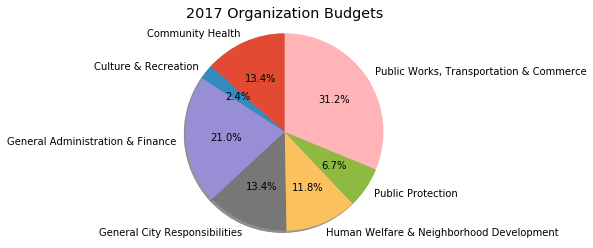

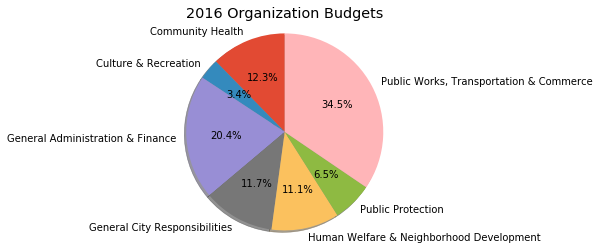

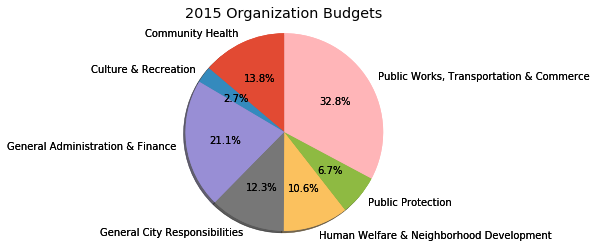

In [25]:

# 2017
sizes = df_aggregated[2017]
labels = df_aggregated.index 

fig, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')
plt.title('2017 Organization Budgets')
plt.show()

# 2016
sizes = df_aggregated[2016]
labels = df_aggregated.index

fig, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')
plt.title('2016 Organization Budgets')
plt.show()

# 2015
sizes = df_aggregated[2015]
labels = df_aggregated.index

fig, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')


plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')
plt.title('2015 Organization Budgets')
plt.show()

In [26]:
df_aggregated_final

,Organization Group,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Community Health,1.612314e+09,1.666675e+09,1.755967e+09,1.887998e+09,1.992195e+09,1.966344e+09,2.329132e+09,2.212122e+09,2.327420e+09,2.453309e+09,2.705308e+09,2.888228e+09,2.671794e+09,2.925926e+09,3.432467e+09,3.254670e+09,3.390694e+09,3.252869e+09,3.561006e+09
1,Culture & Recreation,3.825467e+08,4.583067e+08,6.753082e+08,4.329307e+08,6.281843e+08,3.010599e+08,4.126565e+08,3.776705e+08,4.003927e+08,4.827856e+08,5.147807e+08,5.065681e+08,4.712109e+08,5.423614e+08,5.925263e+08,5.566385e+08,6.579489e+08,9.014759e+08,6.485579e+08
2,General Administration & Finance,1.526019e+09,3.909662e+09,3.408205e+08,1.161024e+09,2.256168e+09,2.400659e+09,2.487618e+09,2.723536e+09,2.986637e+09,3.267007e+09,3.378831e+09,3.487276e+09,3.853319e+09,4.314200e+09,4.259893e+09,4.448084e+09,5.182779e+09,5.389632e+09,5.587066e+09
3,General City Responsibilities,1.270159e+09,1.309816e+09,1.493750e+09,1.517575e+09,1.399779e+09,1.644322e+09,1.604909e+09,1.741225e+09,1.848696e+09,1.908207e+09,2.024137e+09,2.105829e+09,2.286421e+09,2.465610e+09,2.495882e+09,2.732683e+09,3.016059e+09,3.094904e+09,3.554021e+09
4,Human Welfare & Neighborhood Development,8.493115e+08,8.543557e+08,9.487989e+08,1.063567e+09,1.108114e+09,1.222138e+09,1.574985e+09,1.787388e+09,1.820610e+09,1.943585e+09,2.137295e+09,2.375064e+09,2.080685e+09,2.253365e+09,2.348008e+09,2.490060e+09,2.608696e+09,2.936552e+09,3.128494e+09
5,Public Protection,9.310256e+08,1.005086e+09,1.024478e+09,1.036655e+09,1.090154e+09,1.056840e+09,1.146008e+09,1.250613e+09,1.310565e+09,1.405172e+09,1.361873e+09,1.365538e+09,1.403654e+09,1.464716e+09,1.549459e+09,1.602411e+09,1.631839e+09,1.725217e+09,1.779477e+09
7,"Public Works, Transportation & Commerce",4.780520e+09,4.599662e+09,5.322671e+09,4.868352e+09,4.496670e+09,4.384721e+09,4.271710e+09,5.037253e+09,5.309552e+09,5.193302e+09,5.607924e+09,7.498776e+09,7.530713e+09,8.454934e+09,8.609977e+09,8.731192e+09,8.049307e+09,9.111917e+09,8.288559e+09


In [27]:
cols=df_transp.columns[1:]

In [28]:
# we are going to loop through all organization groups and take the column of each of these 
# groups then append what is inside of this column to a numpy array
# this is what we will use for the bar chart
# That or use seaborn
org_groups_formatted = np.array([])
for group in org_groups:
#     print(df_transp[group])
#     print(type(group))
    org_groups_formatted=np.append(org_groups_formatted, df_transp[group])

In [29]:
org_groups_list = list(org_groups)

In [30]:
df_transp.columns

Index(['Year', 'Community Health', 'Culture & Recreation',
       'General Administration & Finance', 'General City Responsibilities',
       'Human Welfare & Neighborhood Development', 'Public Protection',
       'Public Works, Transportation & Commerce'],
      dtype='object', name='Organization Group')

In [31]:
years= df_transp['Year']

In [ ]:

plt.figure(figsize=(22,10))
# np.set_printoptions(suppress=True)

plt.title('Organization Groups 1999-2017')
plt.xlabel('Year')
plt.ylabel('Budget')

# for group in org_groups_list:
#     plt.bar(cols[1:], np.array(df_transp[group]), align='edge')

# for a,b in zip(cols[1:], sum_years_num):
#     plt.text(a, b, str(b), horizontalalignment='left')

# for a,b in zip(cols[1:], pol_budget_num):
#     plt.text(a, b, str(b), horizontalalignment='left')

plt.xticks(np.arange(min(np.array(df_transp['Year'])), max(np.array(df_transp['Year']))+1, 1.0))
# plt.yticks(np.arange(min(np.array(df_transp['Public Works, Transportation & Commerce'])), max(np.array(df_transp['Public Works, Transportation & Commerce'])), 100.0))


plt.plot(years, np.array(df_transp['Public Works, Transportation & Commerce']),
#         align='center', 
         label='Public Works, Transportation & Commerce')

plt.plot(years, np.array(df_transp['General Administration & Finance']), 
#         align='edge', 
         label='General Administration & Finance')
plt.plot(years, np.array(df_transp['Community Health']),
#         align='center', 
         label='Community Health')
plt.plot(years, np.array(df_transp['General City Responsibilities']),
#         align='edge', 
         label='General City Responsibilities')
plt.plot(years, np.array(df_transp['Human Welfare & Neighborhood Development']),
#         align='center', 
         label='Human Welfare & Neighborhood Development')
plt.plot(years, np.array(df_transp['Public Protection']), 
#         align='edge', 
         label='Public Protection')
plt.plot(years, np.array(df_transp['Culture & Recreation']), 
#         align='center', 
         label='Culture & Recreation')

# leg = plt.legend()
# leg_lines = leg.get_lines()
# plt.setp(leg_lines, linewidth=0)

plt.legend()
plt.show()

In [ ]:
df_transp